<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# An introduction to Visualisations in Python - Part 1

We can categorise visualisations in Python based on the number of Variables we want to work with. By this we would have 3 major classes.



1.   Univariate Visualisations
2.   Bivariate Visualisations
3.   Multivariate Visualisations

But first let us perform some preliminary data wrangling.

The dataset we are going to work with is a data on loans from Prosper (From Kaggle Dataset). This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import pandas as pd

%matplotlib inline

In [2]:
%%capture
# the dataset we will be using is the prosper_loan_data.csv from Kaggle
# I will load this into my Pandas DataFrame
url = 'https://github.com/James-M-Beta/2407PTDS/raw/main/Week%207/prosperLoanData.zip'
# Download the zip file
!wget {url}
# Open the ZIP file located at "/content/prosperLoanData.zip" in read mode
with zipfile.ZipFile('/content/prosperLoanData.zip', 'r') as zip_ref:
  # Extract all contents of the ZIP file to the current directory
  zip_ref.extractall()

In [3]:
# the dataset we will be using is the prosper_loan_data.csv from Kaggle
# I will load this into my Pandas DataFrame

df = pd.read_csv('/content/prosperLoanData.csv')


In [4]:
# let's look at what the data holds

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Let us also create a df of the information of the fields in our dataset
var_path = "https://github.com/James-M-Beta/2407PTDS/raw/refs/heads/main/Week%207/Prosper%20Loan%20Data%20-%20Variable%20Definitions%20-%20Sheet1.csv"
var_df = pd.read_csv(var_path)

# let's have a look
var_df.head(50)

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Ch..."
6,ClosedDate,"Closed date is applicable for Cancelled, Compl..."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is ...


In [6]:
# Lets create a function to return the definition of a field
def field_info(field_name):
  if field_name in var_df.Variable.unique():
    field_info = var_df[var_df['Variable'] == field_name]['Description'].tolist()[0]
    print(f"{field_name}:\n{field_info}")
  else:
    print(f"{field_name}:\nField Not found in Data")

In [7]:
# Let us test our function
field_info('AmountDelinquent')
field_info('Not a field in the df')

AmountDelinquent:
Dollars delinquent at the time the credit profile was pulled.
Not a field in the df:
Field Not found in Data


With that out of the way let us continue into exploring the data with **Visualisations**

## Univariate Visualisations.

This is the graphical representation of data from only one variable. It is essential for understanding the distribution and chracteristics of that variable.


**Numerical Data**

Numerical data can be classified into two types: discrete and continuous. Discrete data represent counts that can only take distinct values (e.g., number of cars), while continuous data represent measurements and can take any value within a range (e.g., temperature).

**Choose the Right Type of Plot:**

- **Histograms**: Ideal for showing the distribution of both discrete and continuous numerical datasets. They help in understanding the central tendency, spread, and shape of the data’s distribution.
- **Boxplots**: Provide a summary of one or more numeric variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. More suitable for continuous data but can be used for discrete data to highlight outliers and distribution spread.
- **Bar Charts**: Effective for discrete data, where each bar represents a category defined by discrete values. Useful for comparing quantities across different categories.

**Bin Size Matters:**

- For histograms, the choice of bin size can greatly affect the interpretation. Too many bins can make the data appear noisy and complex, while too few can obscure nuances in the data. Experiment with different bin sizes to find a balance that best represents the underlying distribution of both discrete and continuous data.

**Ensure Readability:**

- Make sure your axes are clearly labeled with understandable terms and units. Titles and axis labels should be concise but informative. This is crucial for both discrete and continuous data to avoid confusion about what the axes represent.

**Use Appropriate Scales:**

- Depending on the distribution of your data, using a logarithmic scale might be appropriate, especially if your data spans several orders of magnitude. This is often more relevant for continuous data but may apply to discrete data if the range is large.

**Consider Data Distribution:**

- **Scatter Plots**: Highly effective for visualizing relationships between two continuous variables. They help identify correlations, trends, and potential outliers in the data.
- **Dot Plots**: Suitable for discrete numerical data, especially when the data set isn't too large. Dot plots are great for showing frequency counts and distributions without aggregation.

By incorporating these additional elements, your guide will cover a broader spectrum of scenarios encountered in data visualization, providing clearer guidance on how to appropriately represent both discrete and continuous numerical data.

In [8]:
# Lets look at the numbers and see if we can make sense of it
df[["Term"]].head(20)

,Term
0,36
1,36
2,36
3,36
4,36
5,60
6,36
7,36
8,36
9,36


In [9]:
df['Term'].value_counts()

,count
Term,
36,87778
60,24545
12,1614


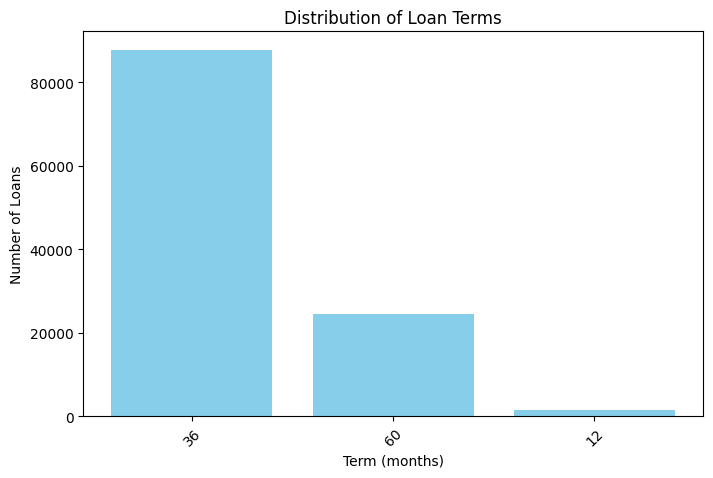

In [10]:
# Now lets take what we know about visualisations and apply it.
# first we will use Matplotlib.Pyplot

import matplotlib.pyplot as plt

# Assuming 'Term' contains a few unique categorical-like values
term_counts = df['Term'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(term_counts.index.astype(str), term_counts.values, color='skyblue')
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (months)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)  # Rotates labels to prevent overlap
plt.show();



<ipython-input-11-a8e6b9cf762b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Term', data=df, palette='Set2')


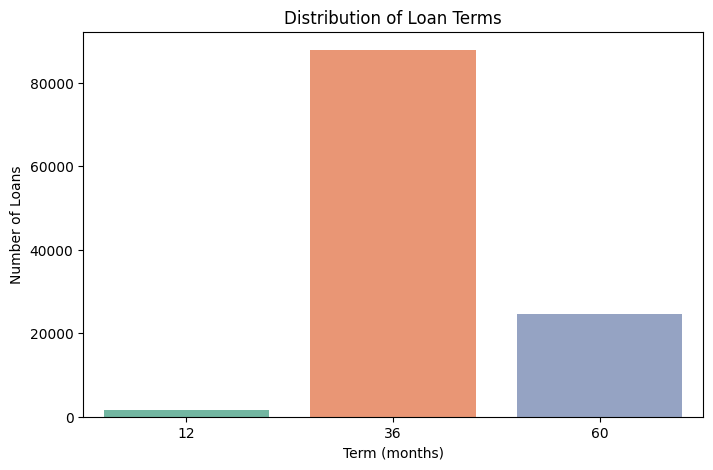

In [11]:
import seaborn as sns

# Using Seaborn to create a count plot which is more straightforward for categorical data
plt.figure(figsize=(8, 5))
sns.countplot(x='Term', data=df, palette='Set2')
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (months)')
plt.ylabel('Number of Loans')
plt.show();


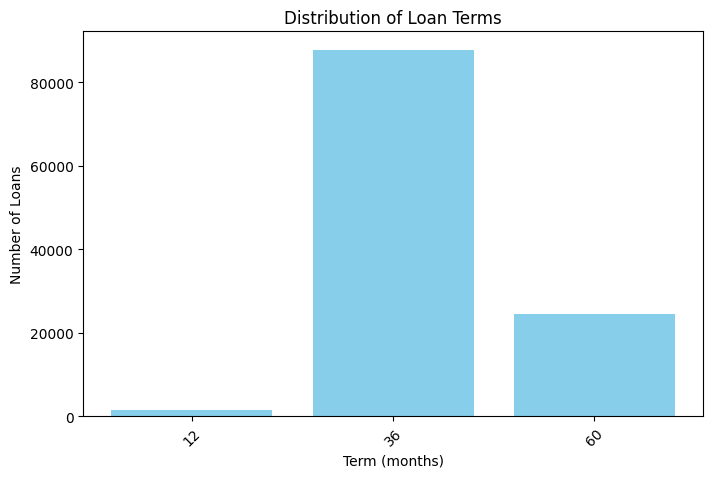

In [12]:
# Since our xaxis was not ordered we need to add more code to order the x-axis

import matplotlib.pyplot as plt

# 'Term' contains a few unique categorical-like values
term_counts = df['Term'].value_counts().sort_index()  # Sorts the index before plotting
plt.figure(figsize=(8, 5))
plt.bar(term_counts.index.astype(str), term_counts.values, color='skyblue')
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (months)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)  # Rotates labels to prevent overlap
plt.show()


**Categorical Data**

Categorical data can be classified into two types: nominal and ordinal. Nominal data represent categories with no intrinsic ordering (e.g., countries, colors), while ordinal data involve categories with a specific order but not necessarily equidistant (e.g., rating scales like poor, fair, good).

**Select Appropriate Visualization Tools:**

- **Bar Charts**: Most common for both nominal and ordinal data. They show the frequency or proportion of each category. For ordinal data, ensure that the categories are ordered as per their ranking to maintain the logical flow.
- **Pie Charts**: Useful for illustrating proportions in datasets with a small number of nominal categories. They are less effective for ordinal data or datasets with many categories or similar counts.
- **Line Charts**: Although less common for categorical data, they can be effective for ordinal data where the progression between categories is meaningful (e.g., stages of a process).

**Label Clearly:**

- Ensure that each category is clearly labeled and that the colors or patterns used are distinguishable from one another. Use a legend if necessary, particularly if colors are used to represent different categories.

**Sort Your Data:**

- For nominal data: Sorting the bars in a bar chart by frequency (e.g., descending) can make your chart easier to interpret.
- For ordinal data: Always maintain the inherent order of the categories to preserve their meaning (e.g., never sort "poor" to "excellent" in a non-logical order).

**Keep Color Simple:**

- Use a consistent, simple color scheme. Reserve the use of bright or varied colors to highlight specific data points of interest or to differentiate nominal categories clearly.

**Avoid Clutter:**

- In both pie charts and bar charts, too many categories can make the chart unreadable. Simplify where possible, perhaps by grouping smaller nominal categories into an 'Other' category. For ordinal data, ensure each category is visible but maintain the sequence integrity.

**Additional Visualization Tools for Nominal Data:**

- **Dot Plots**: Effective for displaying frequencies of nominal categories where the number of categories isn't too large.
- **Heatmaps**: Useful when visualizing the relationship between two nominal variables, showing how the frequency or intensity of outcomes changes across two dimensions.

By tailoring your visualizations to the specific characteristics of nominal and ordinal data, you can more effectively communicate the underlying patterns and distributions in your data. This nuanced approach helps in making informed decisions based on the visualized data and ensures your presentations are both informative and aesthetically pleasing.

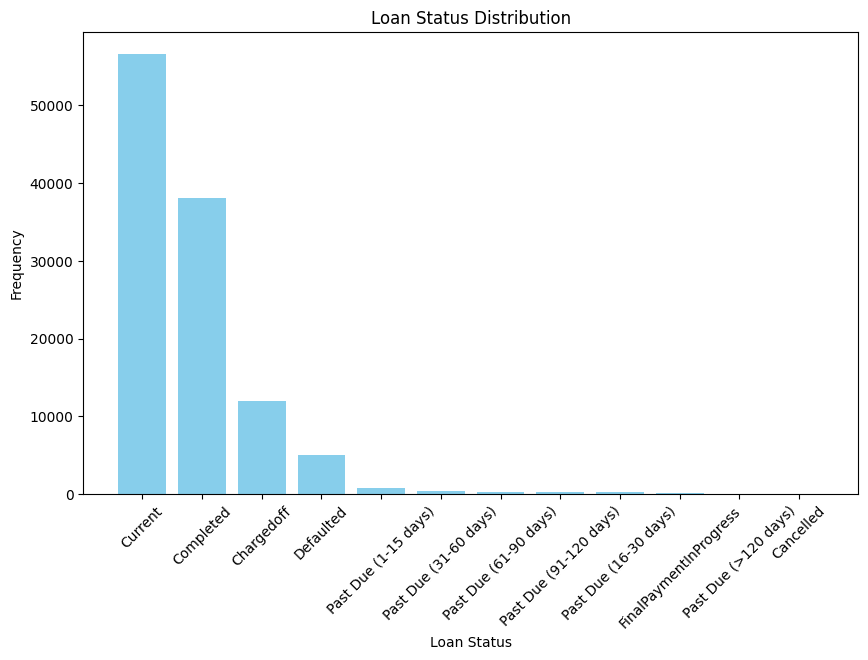

In [13]:
# lets explore and give context to the loan status field

# Count the occurrences of each loan status
loan_status_counts = df['LoanStatus'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(loan_status_counts.index, loan_status_counts.values, color='skyblue')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()

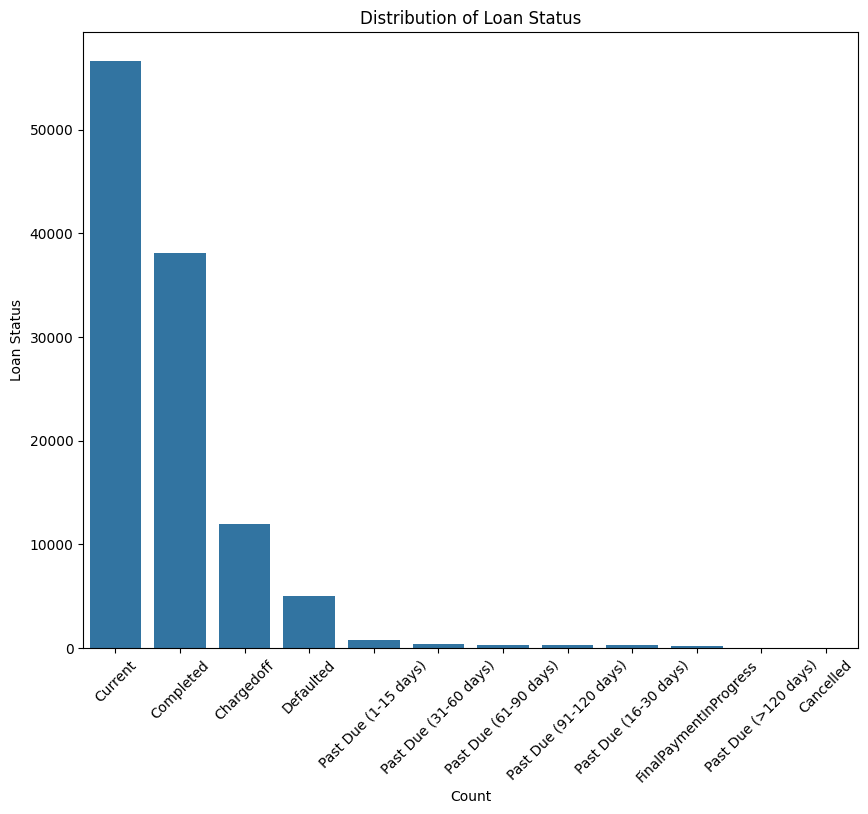

In [14]:
# The same plot using seaborn

# Plotting the distribution of Loan Status
plt.figure(figsize=(10, 8))
sns.countplot(x='LoanStatus', data=df, order = df['LoanStatus'].value_counts().index)
plt.title('Distribution of Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()


## General Tips

- **Consistency in Design**: Use a consistent style for fonts, colors, and layout throughout your visualizations to make your presentation look professional.
- **Accessibility**: Consider color blindness and other visual impairments when choosing color schemes.
- **Purpose-Driven Design**: Always keep the purpose of the visualization in mind. Tailor your design to support the story you want the data to tell.
- **Use of Annotations**: Adding text annotations can help highlight key points and observations, making your visualizations more informative.

By applying these tips, you can create univariate visualizations that are not only visually appealing but also meaningful and easy to interpret.